In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.mappings import beat_to_area, area_to_neighborhood

data_path = os.path.join('..', 'data', 'cases.csv')
df_cleaned = pd.read_csv(data_path)

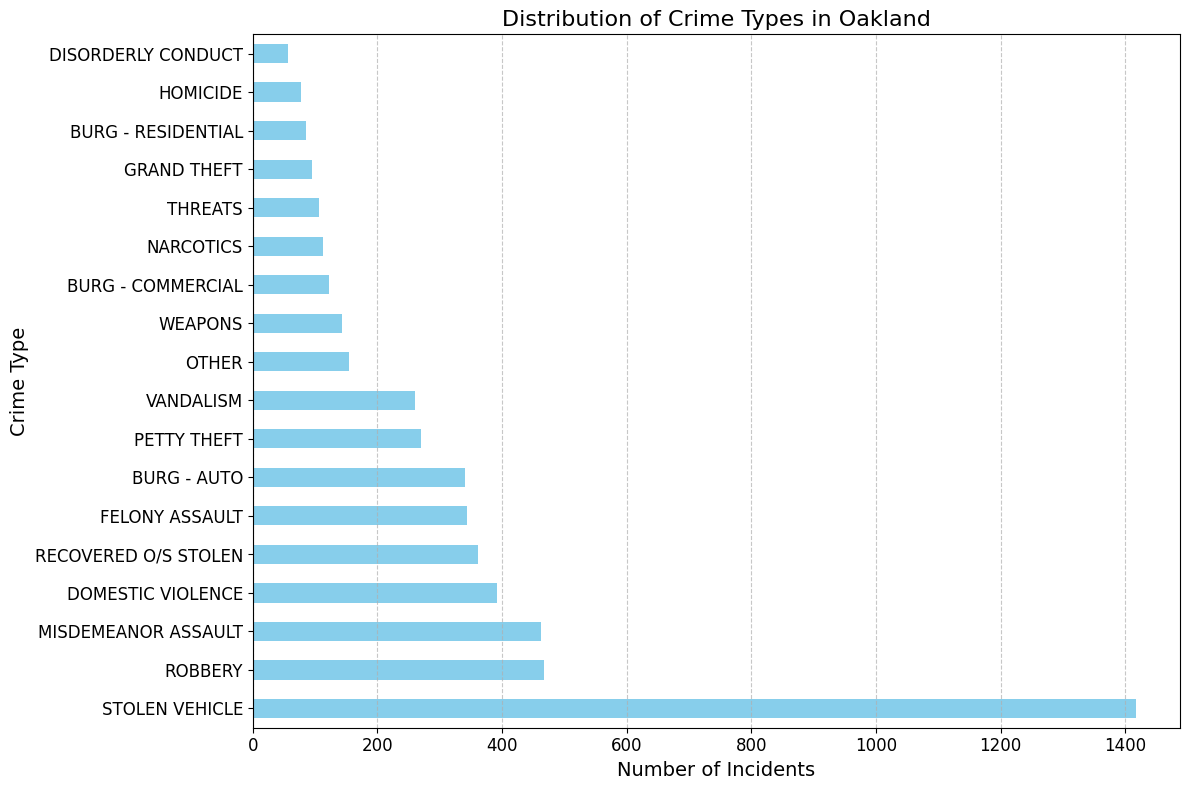

In [3]:
# Question 1

crime_type_distribution = df_cleaned["CRIMETYPE"].value_counts()

min_incidents = 50
filtered_crime_type_distribution = crime_type_distribution[crime_type_distribution >= min_incidents]

plt.figure(figsize=(12, 8))
filtered_crime_type_distribution.plot(kind='barh', color='skyblue')
plt.title('Distribution of Crime Types in Oakland', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


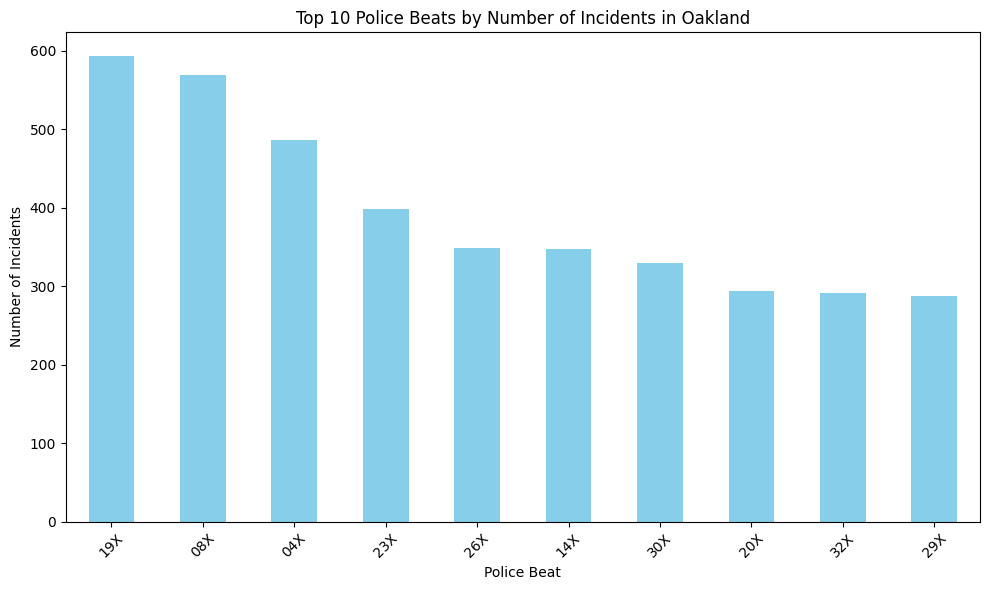

In [4]:
# Question 2

import matplotlib.pyplot as plt

crime_by_beat = df_cleaned['POLICEBEAT'].value_counts()
top_5_beats = df_cleaned['POLICEBEAT'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_5_beats.plot(kind='bar', color='skyblue')
plt.title('Top 10 Police Beats by Number of Incidents in Oakland')
plt.xlabel('Police Beat')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

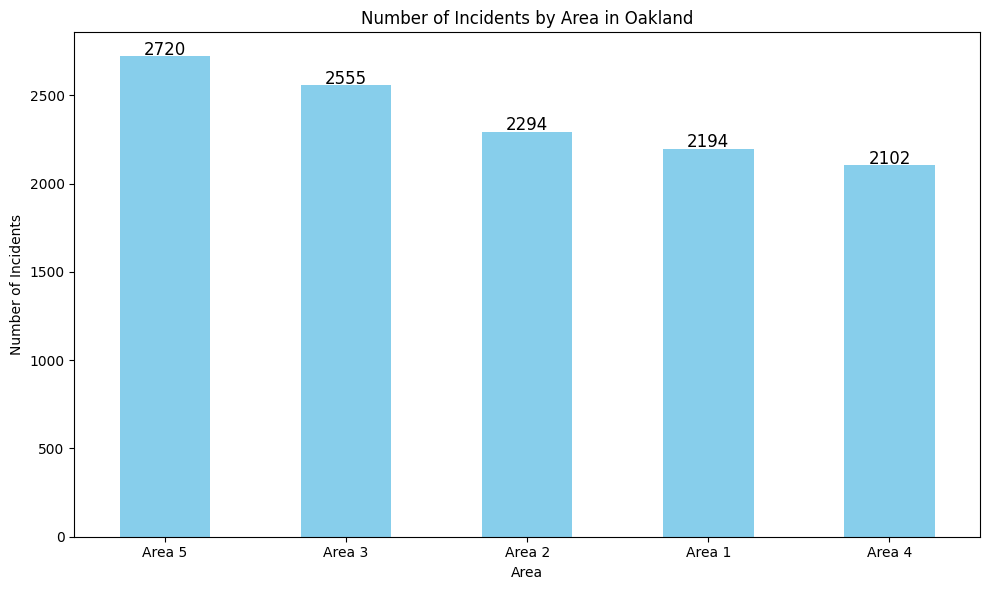

In [5]:
df_cleaned['Area'] = df_cleaned['POLICEBEAT'].map(beat_to_area)

incidents_by_area = df_cleaned['Area'].value_counts()

# Plot the number of incidents by area
plt.figure(figsize=(10, 6))
incidents_by_area.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Area in Oakland')
plt.xlabel('Area')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)

# Add data labels on top of each bar
for index, value in enumerate(incidents_by_area):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


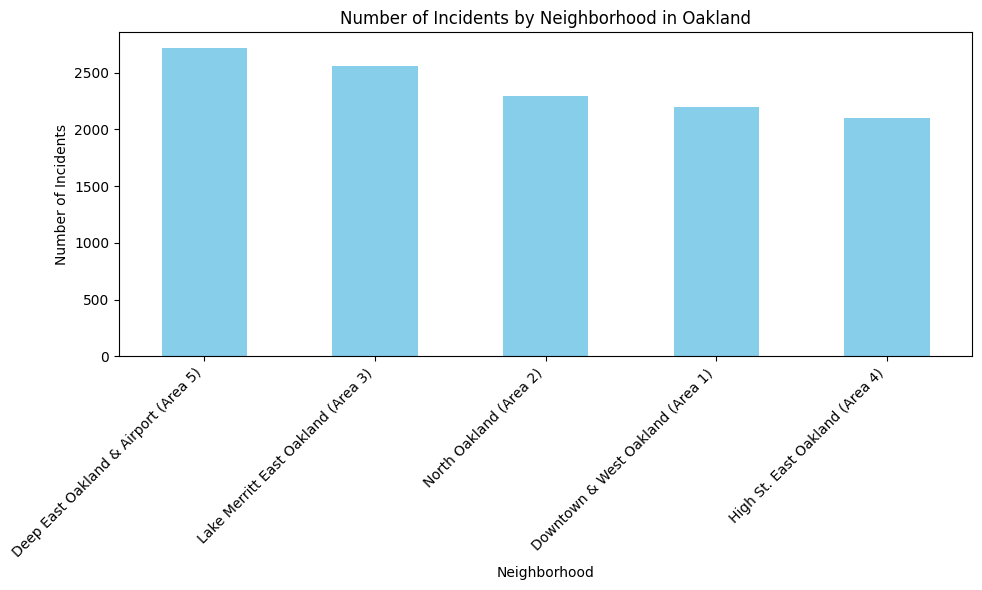

In [7]:
# Rename the areas using the beat_to_neighborhood dictionary
incidents_by_area_renamed = incidents_by_area.rename(index=area_to_neighborhood)

# Plot the number of incidents by the renamed areas
plt.figure(figsize=(10, 6))
incidents_by_area_renamed.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Neighborhood in Oakland')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
